In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')



In [2]:
rf = joblib.load('../Models/rf_model.pkl')
scaler = joblib.load('../Models/scaler.pkl')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\devin\\AI-agriculture-yield-prediction\\Models\\rf_model.pkl'

In [ ]:
df = pd.read_csv('../Models/test_predictions.csv')

In [ ]:
r2 = r2_score(df['Actual'], df['Predicted'])
mae = mean_absolute_error(df['Actual'], df['Predicted'])
rmse = mean_squared_error(df['Actual'], df['Predicted'])
print(r2*100) 
print(mae)
print(rmse)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6,5))
sns.scatterplot(x=df['Actual'], y=df['Predicted'])
plt.xlabel("Actual Yield (kg/ha)")
plt.ylabel("Predicted Yield (kg/ha)")
plt.title("Actual vs Predicted Rice Yield")
plt.savefig('../Plots/actual_vs_predicted.png')
plt.grid(True)
plt.show()


In [ ]:
residuals = df['Actual'] - df['Predicted']
sns.histplot(residuals, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Prediction Error")
plt.savefig('../Plots/Prediction_error.png')
plt.show()

**ERROR ANALYSIS**


*To Identify patterns in misclassified/mispredicted rows*


In [7]:
df['Residual'] = df['Actual']-df['Predicted']
df['Abs_Error']= df['Residual'].abs()


In [8]:
mispredicted_rows = df.sort_values(by='Abs_Error', ascending =False)
display(mispredicted_rows)

,Actual,Predicted,Residual,Abs_Error
446,2500.00,0.000000,2500.000000,2500.000000
462,4555.00,2746.602333,1808.397667,1808.397667
268,3250.00,1522.602111,1727.397889,1727.397889
67,4335.42,2641.092667,1694.327333,1694.327333
153,1198.10,2279.467667,-1081.367667,1081.367667
...,...,...,...,...
27,0.00,0.000000,0.000000,0.000000
23,0.00,0.000000,0.000000,0.000000
182,0.00,0.000000,0.000000,0.000000
465,0.00,0.000000,0.000000,0.000000


In [9]:
df1= pd.read_csv('../Datasets/rice_data_outlier_removed.csv')
df1.head()


,Unnamed: 0,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),State_en
0,0,2010,Chhattisgarh,Durg,777.92,1319.18,1695.77,3
1,1,2011,Chhattisgarh,Durg,806.55,1416.48,1756.23,3
2,2,2012,Chhattisgarh,Durg,807.07,1534.22,1900.97,3
3,3,2013,Chhattisgarh,Durg,819.44,1296.24,1581.86,3
4,4,2014,Chhattisgarh,Durg,834.87,1444.24,1729.89,3


In [10]:
m_index= mispredicted_rows.index
error_df= df1.loc[m_index]
#error_df.head()
error_df['Actual'] = mispredicted_rows['Actual']
error_df['Predicted'] = mispredicted_rows['Predicted']
error_df['Abs_Error'] = mispredicted_rows['Abs_Error']
error_df.head()

,Unnamed: 0,Year,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),State_en,Actual,Predicted,Abs_Error
446,447,2017,Telangana,Nizamabad,267.21,968.95,3626.14,16,2500.00,0.000000,2500.000000
462,463,2017,Telangana,Mahabubnagar,170.82,420.07,2459.12,16,4555.00,2746.602333,1808.397667
268,269,2015,Madhya Pradesh,Jhabua,15.00,11.33,755.33,10,3250.00,1522.602111,1727.397889
67,67,2013,Madhya Pradesh,Chhindwara,13.81,28.05,2031.14,10,4335.42,2641.092667,1694.327333
153,154,2012,Madhya Pradesh,Satna,85.38,197.67,2315.18,10,1198.10,2279.467667,1081.367667


In [11]:
error_df.shape

(494, 11)

In [12]:
state_error = error_df.groupby(['State Name'])['Abs_Error'].mean().sort_values(ascending=False)
print("Avg Absolute error per state")
print(state_error.head())


year_error = error_df.groupby(['Year'])['Abs_Error'].mean().sort_values(ascending=False)
print("Evg Absolute Error per year")
print(year_error.head())

Avg Absolute error per state
State Name
Telangana         158.147374
Madhya Pradesh    107.787619
Andhra Pradesh     86.337477
Chhattisgarh       78.133429
Name: Abs_Error, dtype: float64
Evg Absolute Error per year
Year
2017    138.534274
2015    127.503208
2010    116.381590
2016    107.296235
2013    101.943108
Name: Abs_Error, dtype: float64


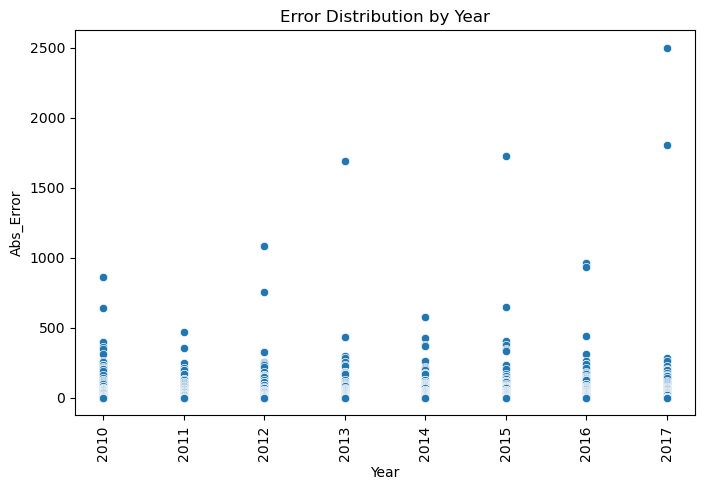

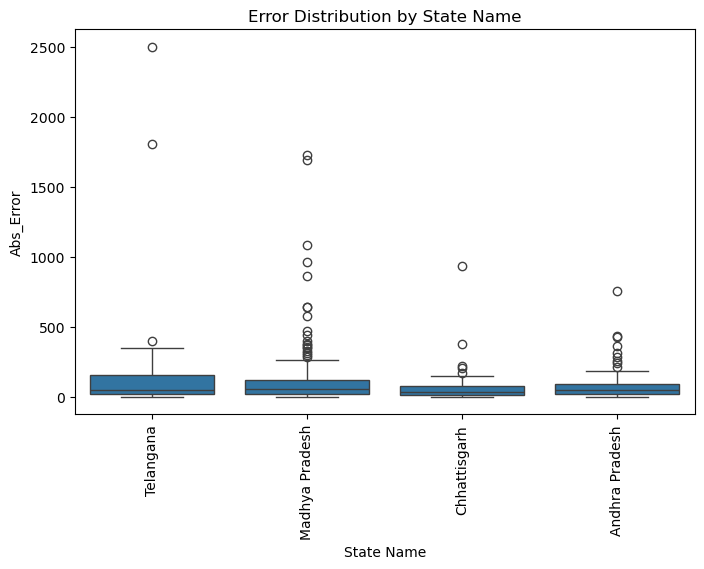

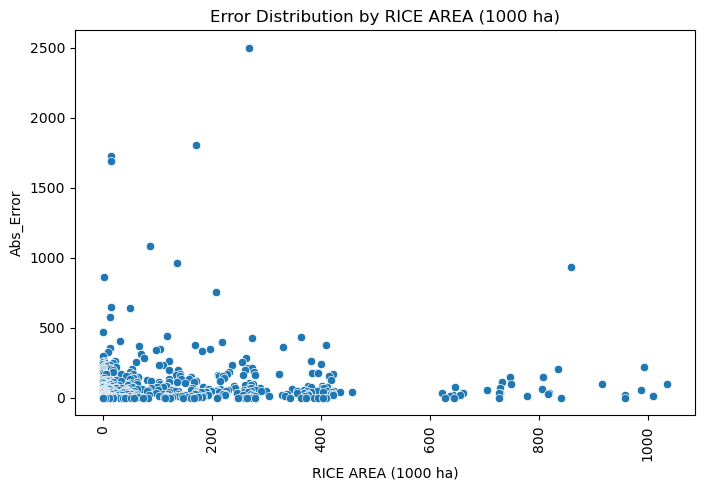

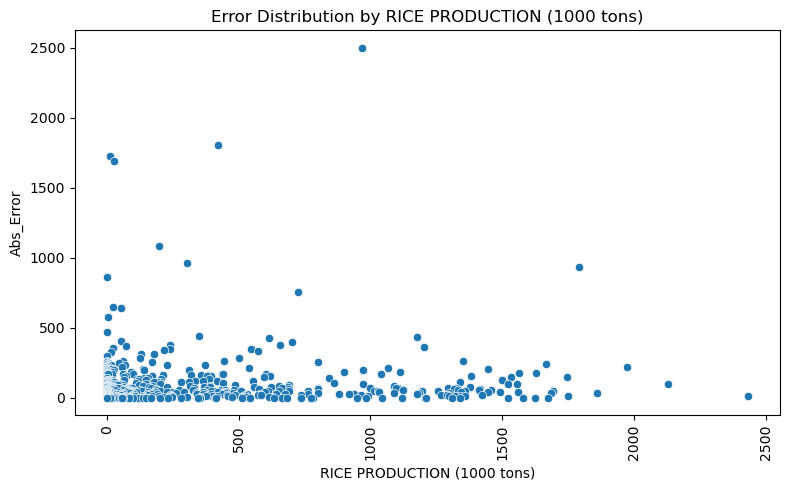

In [13]:
cols =  error_df[['Year','State Name' , 'RICE AREA (1000 ha)','RICE PRODUCTION (1000 tons)']]

for col in cols:
    plt.figure(figsize=(8,5))
    
    if error_df[col].dtype == 'object':
        sns.boxplot(x=col , y='Abs_Error' , data=error_df)
        plt.xticks(rotation= 90)
        plt.title(f'Error Distribution by {col}')
    else:
        sns.scatterplot(x=col , y='Abs_Error', data = error_df)
        plt.xticks(rotation=90)
        plt.title(f'Error Distribution by {col}')

plt.tight_layout()
plt.show()

In [14]:

state_error = error_df.groupby('State Name')['Abs_Error'].mean().sort_values(ascending=False)
year_error = error_df.groupby('Year')['Abs_Error'].mean().sort_values(ascending=False)

print("Top 10 States by prediction error:")
print(state_error.head(10))
print("\nError by Year:")
print(year_error)


Top 10 States by prediction error:
State Name
Telangana         158.147374
Madhya Pradesh    107.787619
Andhra Pradesh     86.337477
Chhattisgarh       78.133429
Name: Abs_Error, dtype: float64

Error by Year:
Year
2017    138.534274
2015    127.503208
2010    116.381590
2016    107.296235
2013    101.943108
2012    101.011675
2014     94.421877
2011     73.969379
Name: Abs_Error, dtype: float64


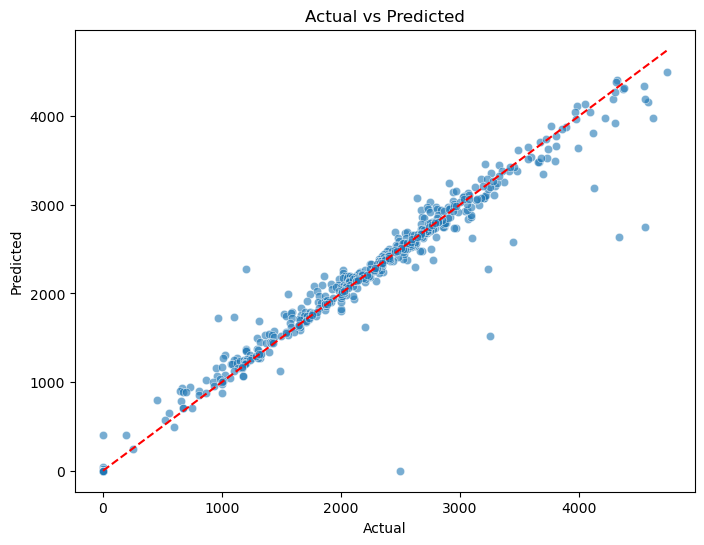

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Actual', y='Predicted', data=mispredicted_rows, alpha=0.6)
plt.plot([mispredicted_rows['Actual'].min(), mispredicted_rows['Actual'].max()],
         [mispredicted_rows['Actual'].min(), mispredicted_rows['Actual'].max()],
         color='red', linestyle='--')  # ideal predictions line
plt.title("Actual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()